# Placement Predictor Model

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('Placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.shape # It means its a 2D Tensor

(100, 4)

In [9]:
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [10]:
import matplotlib.pyplot as plt

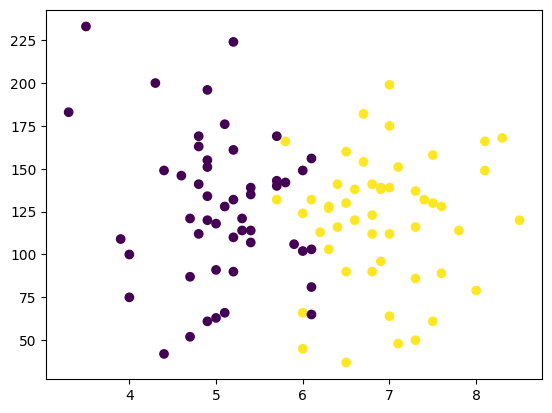

In [11]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [12]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
print(x.shape) # 2D Tensor
print(y.shape) # 1D Tensor

(100, 2)
(100,)


In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [16]:
x_test

,cgpa,iq
45,6.0,66.0
99,6.2,113.0
43,6.8,141.0
89,4.9,151.0
79,6.5,90.0
19,5.2,132.0
34,4.8,163.0
7,5.0,63.0
91,7.5,158.0
77,7.3,50.0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
x_train

,cgpa,iq
80,4.9,196.0
78,6.1,81.0
37,8.1,149.0
0,6.8,123.0
46,5.3,114.0
...,...,...
72,7.3,116.0
18,4.0,100.0
31,3.9,109.0
60,6.9,139.0


In [20]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_train

array([[-0.9408031 ,  1.80345207],
       [ 0.09705936, -1.10897247],
       [ 1.82683013,  0.61315682],
       [ 0.70247913, -0.04530438],
       [-0.59484895, -0.27323326],
       [ 1.13492182,  0.30925165],
       [ 0.87545621,  1.27161802],
       [-0.9408031 , -0.12128067],
       [-0.76782603, -1.48885394],
       [ 0.01057082, -0.01997895],
       [-0.24889479,  0.46120423],
       [ 0.87545621, -1.5395048 ],
       [-0.76782603,  1.29694345],
       [-0.50836041,  0.35990251],
       [ 0.44301352,  0.13197363],
       [ 0.87545621, -0.32388412],
       [ 0.35652498,  0.41055337],
       [ 0.09705936,  0.1826245 ],
       [ 0.96194475, -1.94471169],
       [-0.9408031 ,  0.23327536],
       [ 0.09705936, -1.51417937],
       [-0.50836041, -0.45051127],
       [ 1.3078989 , -1.61548109],
       [ 0.70247913, -0.32388412],
       [-0.16240626,  0.4358788 ],
       [ 0.01057082,  0.61315682],
       [-0.9408031 ,  0.7651094 ],
       [ 0.27003644,  0.08132277],
       [-0.85431457,

In [22]:
x_test = scaler.transform(x_test) # As we know the pattern we do not have to use fit_transform

In [23]:
x_test

array([[ 0.01057082, -1.48885394],
       [ 0.1835479 , -0.29855869],
       [ 0.70247913,  0.41055337],
       [-0.9408031 ,  0.66380768],
       [ 0.44301352, -0.8810436 ],
       [-0.68133749,  0.1826245 ],
       [-1.02729164,  0.96771285],
       [-0.85431457, -1.56483023],
       [ 1.3078989 ,  0.8410857 ],
       [ 1.13492182, -1.89406083]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

### Model Training

In [26]:
clf.fit(x_train, y_train)

LogisticRegression()

In [27]:
clf.predict(x_test) # Pass the test values to test the model 

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [28]:
y_test # This is the real placement data 

45    1
99    1
43    1
89    0
79    1
19    0
34    0
7     0
91    1
77    1
Name: placement, dtype: int64

In [29]:
# Test the accuracy
y_pred = clf.predict(x_test)

### Testing the accuracy

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred) # 1.0 means 100% accuracy

0.9

### So to see the pattern created by Logistic Regression we can use the library mlxtend

In [ ]:
!pip install mlxtend

In [2]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

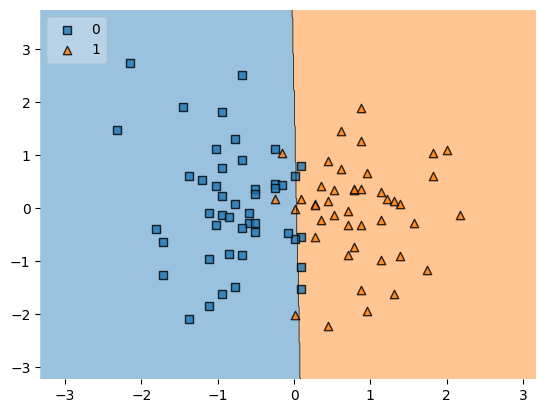

In [32]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

### To save the Trained Model 

In [33]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb')) 

In [36]:
# You can later import it like this anywhere
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [38]:
predictions = loaded_model.predict(x_test)

In [39]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])